# cluster analysis of seasonal / hourly mean diurnal cycle

#### uses Affinity Propagation

+ [Affinity Propagation enty on wikipedia](https://en.wikipedia.org/wiki/Affinity_propagation)
+ [Frey and Dueck paper in Science](http://science.sciencemag.org/content/315/5814/972)

In [1]:
%config InlineBackend.figure_formats = {'svg','retina'} 

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap as bm

In [3]:
from glob import glob

In [4]:
import os, sys

In [5]:
import numpy as np
from numpy import ma
import pandas as pd

In [6]:
np.random.seed(42)

In [7]:
geodata = pd.read_csv('../data/geo_subset.csv', index_col=0)

In [8]:
lfiles = glob('../outputs/seasonal_hourly_mean_cycle_f_d_98*.csv')

In [9]:
lfiles.__len__()

46

In [10]:
d = {}

In [11]:
for fname in lfiles: 
    station = fname.split('_')[-1].split('.')[0]
    data = pd.read_csv(fname, index_col=0)
    data = data.stack()
    d[station] = data.values

In [12]:
df = pd.DataFrame(d)

In [13]:
df.head()

,98801001,98802003,98802008,98803001,98803002,98803003,98803006,98804001,98805001,98807001,...,98825001,98826002,98827001,98827002,98829003,98830002,98832002,98832003,98832004,98832006
0,0.039551,0.033420,0.023118,0.022343,0.016437,0.033673,0.030527,0.052898,0.032541,0.046197,...,0.029429,0.044673,0.020174,0.026996,0.064669,0.053518,0.041164,0.028556,0.034493,0.045695
1,0.034905,0.033340,0.028252,0.027297,0.020262,0.034063,0.027666,0.052905,0.031122,0.051557,...,0.021546,0.047211,0.019344,0.029221,0.057550,0.045979,0.050994,0.036299,0.035155,0.039097
2,0.044097,0.039000,0.026307,0.026062,0.029002,0.028922,0.030593,0.052781,0.034652,0.051419,...,0.023020,0.051078,0.026181,0.029417,0.040293,0.046869,0.048036,0.034486,0.037653,0.043141
3,0.044070,0.024955,0.019484,0.024016,0.020807,0.023699,0.027088,0.043522,0.026984,0.053601,...,0.021980,0.044872,0.024018,0.030199,0.045300,0.058189,0.052194,0.035722,0.034668,0.039360
4,0.057729,0.027529,0.020464,0.015814,0.015580,0.020729,0.022774,0.035142,0.028727,0.053236,...,0.019134,0.049656,0.020496,0.027786,0.036090,0.050440,0.054073,0.036511,0.035895,0.047255


In [14]:
def scale(x): 
    z = (x - x.min()) / (x.max() - x.min())
    return z

In [15]:
df = df.apply(scale)

In [16]:
df = df.T

In [17]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
98801001,0.468150,0.393670,0.541026,0.540593,0.759568,0.627447,0.416411,0.358752,0.594267,0.295773,...,0.313169,0.348161,0.665488,0.402069,0.272803,0.838457,0.907672,0.539766,0.660334,0.520113
98802003,0.211345,0.210676,0.257964,0.140618,0.162125,0.088737,0.123241,0.181005,0.177381,0.200456,...,0.350773,0.307742,0.739116,0.377598,0.226304,0.400332,0.366556,0.314092,0.229638,0.164948
98802008,0.101923,0.140653,0.125982,0.074503,0.081899,0.081415,0.105406,0.068541,0.070210,0.106686,...,0.580221,0.592081,0.532580,0.408208,0.422591,0.443227,0.415365,0.223605,0.190826,0.074881
98803001,0.065886,0.112440,0.100831,0.081606,0.004543,0.050207,0.035592,0.000000,0.047921,0.076090,...,0.558881,0.788531,1.000000,0.613837,0.514382,0.291934,0.262918,0.255438,0.100304,0.209163
98803002,0.015156,0.048562,0.124883,0.053316,0.007669,0.011103,0.083760,0.029269,0.046010,0.012414,...,0.565140,1.000000,0.753544,0.706338,0.444454,0.278335,0.192824,0.164334,0.117022,0.194402


In [18]:
from sklearn.cluster import AffinityPropagation as AP

### cluster analysis with Affinity Propagation

In [19]:
af = AP().fit(df.values)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 5


In [20]:
labels

array([4, 3, 3, 3, 3, 3, 3, 1, 3, 4, 4, 3, 1, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0,
       0, 3, 3, 1, 1, 1, 4, 1, 3, 2, 4, 3, 4, 3, 1, 3, 3, 4, 4, 1, 3, 3, 1])

In [21]:
labels_df = pd.DataFrame(labels, index=list(map(int,df.index)), columns=['cluster_AP'])

In [22]:
geodata.loc[:,'cluster_AP'] = labels_df['cluster_AP']

In [23]:
geodata.head()

,NOM_USUEL,LON_DG,LAT_DG,LAMBX_100,LAMBY_100,ALTI,cluster_AP
NUM_POSTE,,,,,,,
98801001,BELEP AEROD.,163.659667,-19.721167,1545.75,4950.98,82,4
98802003,BOURAKE,165.999833,-21.942500,3999.83,2510.11,53,3
98802008,NASSIRAH,166.063167,-21.815000,4065.31,2651.26,52,3
98803001,BOURAIL,165.493833,-21.554833,3475.75,2938.45,25,3
98803002,LE CAP MAORI,165.365167,-21.480667,3342.15,3020.06,70,3


In [24]:
from matplotlib import style

In [25]:
style.use('classic')

In [26]:
lat = geodata.LAT_DG.values
lon = geodata.LON_DG.values

In [27]:
m = bm(projection='cyl', llcrnrlat=lat.min()-0.25, urcrnrlat=lat.max()+0.25, \
       llcrnrlon=lon.min()-0.25, urcrnrlon=lon.max()+0.25, resolution='f')

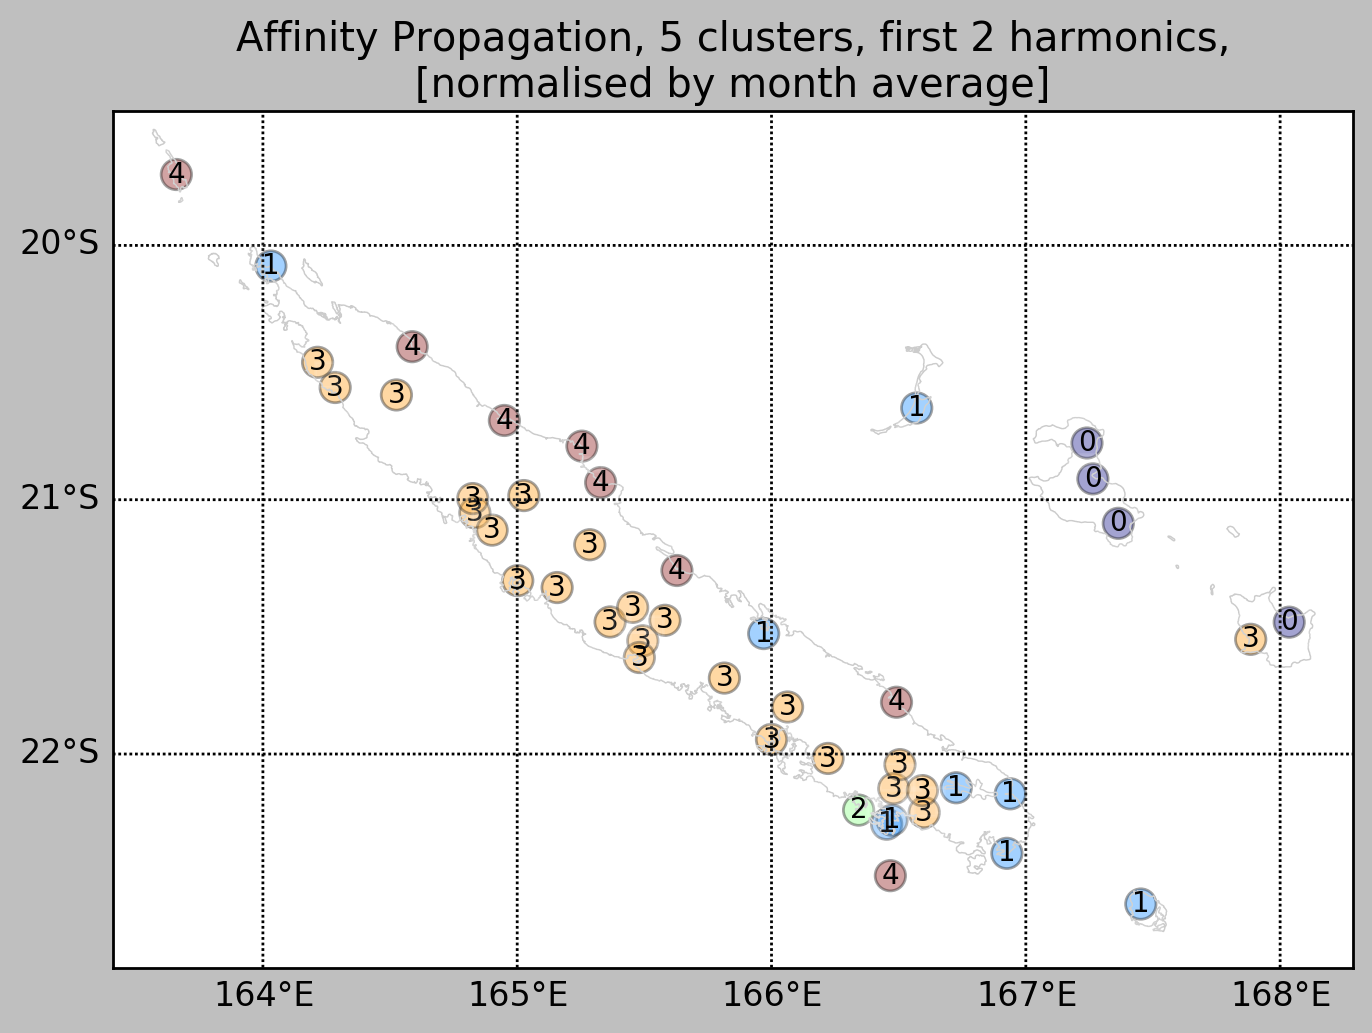

In [38]:
f, ax = plt.subplots(figsize=(8,6))
m.ax = ax
m.drawcoastlines(color='0.8',linewidth=0.5)

m.scatter(lon,lat,s=120, c=geodata.cluster_AP, alpha=0.4)

m.drawparallels(np.arange(-90.,90.,1), labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,1), labels=[0,0,0,1]);

x,y = m(lon,lat)
clusters_labels = list(map(str,geodata.cluster_AP.values.astype(np.int)))
for i in range(len(clusters_labels)): 
    ax.text(x[i],y[i],clusters_labels[i], \
            horizontalalignment='center',verticalalignment='center',\
           bbox=dict(facecolor='w', edgecolor='w',alpha=0.1), fontsize=10)
    
ax.set_title('Affinity Propagation, {} clusters, first 2 harmonics,\n[normalised by month average]'.format(n_clusters_))

f.savefig('../figures/classif_{}clusters_AP_f_d.png'.format(n_clusters_), dpi=200)

### get the exemplars

In [29]:
cluster_centers_indices

array([20, 28, 32, 34, 41])

In [30]:
exemplars = df.iloc[cluster_centers_indices,:]
exemplars = exemplars.values.reshape(n_clusters_,12,24)

In [31]:
df.iloc[cluster_centers_indices,:].index

Index(['98814001', '98818002', '98821006', '98823002', '98830002'], dtype='object')

In [32]:
exemplars_df = geodata.ix[map(int, df.iloc[cluster_centers_indices,:].index)]

In [33]:
exemplars_df

,NOM_USUEL,LON_DG,LAT_DG,LAMBX_100,LAMBY_100,ALTI,cluster_AP
NUM_POSTE,,,,,,,
98814001,OUANAHAM,167.240500,-20.777000,5291.64,3795.25,30,0
98818002,MAGENTA,166.473667,-22.260333,4488.22,2157.47,3,1
98821006,POINTE MA,166.342500,-22.220500,4353.12,2201.93,5,2
98823002,AOUPINIE,165.285333,-21.177000,3257.89,3355.87,905,3
98830002,TOUHO AEROD.,165.254500,-20.789333,3223.83,3784.87,2,4


In [34]:
exemplars_df.index = range(6)

ValueError: Length mismatch: Expected axis has 5 elements, new values have 6 elements

In [ ]:
exemplars